In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
    print("Agrego el src")

/home/alejandro/.dev/tda_2023Q1/tp2/src
Agrego el src


In [2]:
from data import generate_random_data
from bruteforce import bruteforce, pack
from utils import perform_time_test

import matplotlib.pyplot as plt
import pandas as pd
import random
from collections.abc import Iterable
from multiprocessing import Pool

In [3]:
generate_random_data()

[0.93, 0.47, 0.24, 0.52, 0.49, 0.93, 0.74, 0.58, 0.79, 0.31]

In [4]:
def ratio_f(n, data):
    result_Z, _ = perform_time_test(bruteforce, data)
    result_A, _ = perform_time_test(pack, data)
    
    return n, len(result_A), len(result_Z), len(result_A)/len(result_Z)


def test_ratio(nsets: Iterable[float], pool_size=1):
    ns = []
    approximate_results = []
    exact_results = []
    ratio_results = []

    async_responses = []
    
    with Pool(pool_size) as p:
        for data in nsets:
            nlen = len(data)
            #print(f'Llamo con {nlen} y {data}')
            async_res = p.apply_async(ratio_f, args=(nlen, data))
            #print(f'Obtuve como resultado de {nlen} en {exe_time}')
            async_responses.append(async_res)
            #time_results.append(exe_time)
            #ns.append(nlen)

        for async_res in async_responses:
            try:
                async_res.wait()
                n, result_approx, result_exact, ratio = async_res.get()
                ns.append(n)
                approximate_results.append(result_approx)
                exact_results.append(result_exact)
                ratio_results.append(ratio)
            except KeyboardInterrupt:
                print("Exiting at client will")
                pass

    df = pd.DataFrame({'n': ns, 'approx': approximate_results, 'optimal': exact_results, 'ratio': ratio_results})
    return df

In [5]:
df_accum = None

In [26]:
%%time
min_n = 6
max_n = 10
total_tests = 500

testdata = (generate_random_data(length=random.randint(min_n, max_n)) for i in range(total_tests))
#list(testdata)
    
df_test = test_ratio(nsets=testdata, pool_size=4)
if df_accum is None:
    df_accum = df_test
else:
    df_accum = pd.concat([df_accum, df_test])
#df_test

CPU times: user 619 ms, sys: 81.2 ms, total: 701 ms
Wall time: 7min 43s


In [27]:
len(df_accum)

1630

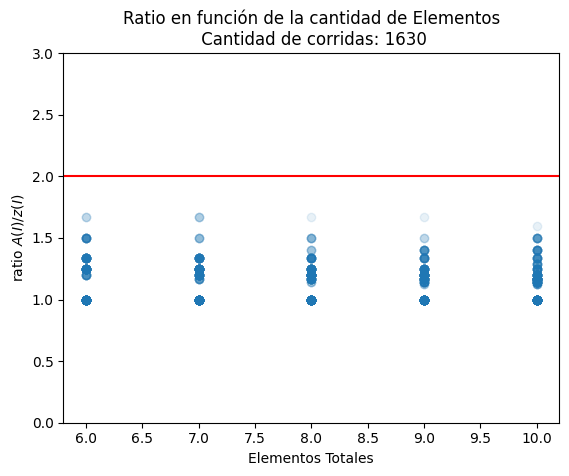

In [38]:
plt.scatter(df_accum['n'], df_accum['ratio'], alpha=0.1)
plt.axhline(y = 2, color = 'r', linestyle = '-')
plt.ylim(0, 3)
plt.xlabel("Elementos Totales")
plt.ylabel("ratio $A(I)/z(I)$")
plt.title(f"Ratio en función de la cantidad de Elementos\n Cantidad de corridas: {len(df_accum)}")
plt.show()

In [29]:
df_accum['ratio'].max()

1.6666666666666667